In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import colors
import numpy as np
import datetime as dt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os, ssl

In [3]:
map1=gpd.read_file("for_ashley.rar/for_ashley.shp")
pa1=pd.read_csv("for_ashley.csv")

# We're using a shapefile and csv compiled from the Johns Hopkins COVID-19 github repository. The data generally reflects the same case totals found on the state's DOH website, but uses Philadelphia's estimates directly. That's the only notable difference between the two sources that I've seen. 
### A quick note on the columns:

In [7]:
print(pa1.columns)
print(map1.columns)

Index(['FIPS', 'date', 'confirmed', 'county', 'Province_State', 'population',
       'case_diff', 'case_diff14d', 'case_diff7d', 'case_diff_av14d',
       'case_diff_av7d', 'case_diff_av3d', 'regions', 'yellow_metric',
       'newtest1'],
      dtype='object')
Index(['county', 'FIPS', 'date', 'confirmed', 'Province_S', 'population',
       'case_diff', 'case_diff1', 'case_diff7', 'case_diff_', 'case_dif_1',
       'case_dif_2', 'regions', 'yellow_met', 'newtest1', 'geometry'],
      dtype='object')


### We really only need to pay attention to the "newtest1" column here. I took used the _confirmed_ column to first find the daily difference in new cases found in _case diff_ column. I then used the _case diff_ column to calculate the 14-day, 7-day and 3-day average cases. 
### _Newtest1_ column is the 14-day average difference in new cases at a rate per 100,000 people. Here's the formula: (pa1.case_diff_av14d / pa1.population) * 100000

In [9]:
# Just need to convert my data columns to the proper format and set yesterday's date
map1['date']=pd.to_datetime(map1.date)
pa1['date']=pd.to_datetime(pa1.date)
yesterday=pd.to_datetime(dt.date.today()-pd.DateOffset(days=1))

Text(0.5, 0, 'Dates')

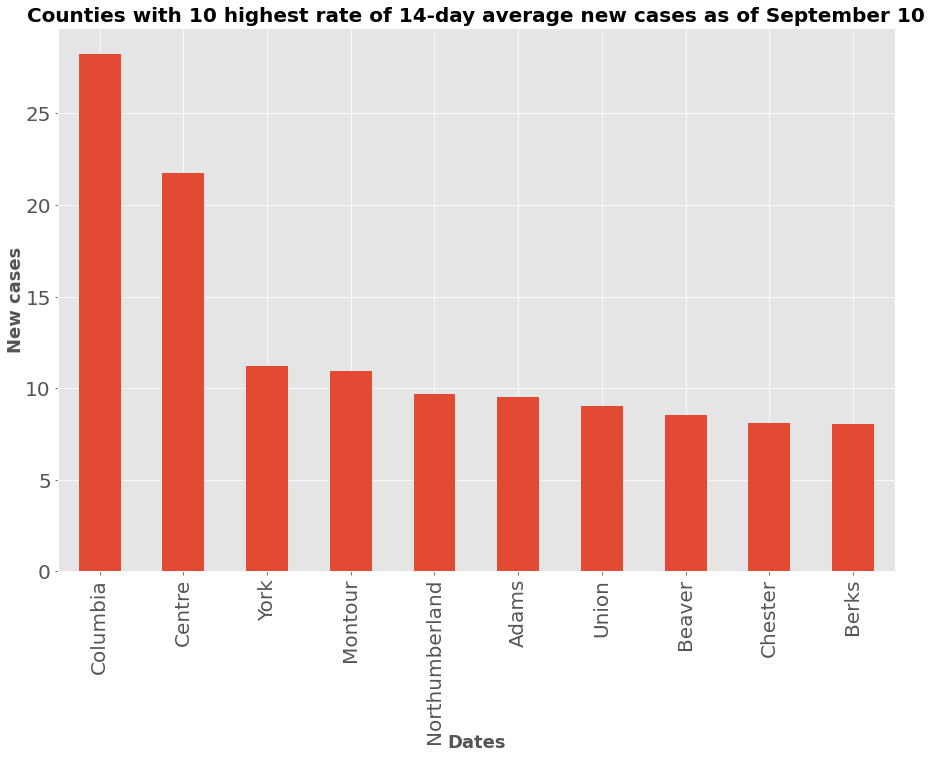

In [33]:
pa1[pa1.date==yesterday].groupby('county').newtest1.sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,10),fontsize=20)
plt.title('Counties with 10 highest rate of 14-day average new cases as of '+yesterday.month_name()+" "+str(yesterday.day),
          fontdict={'fontsize': '20',
                    'fontweight' : 'bold',
                    'verticalalignment': 'baseline'})
plt.ylabel("New cases",fontdict={'fontsize': '18',
                    'fontweight' : 'heavy',
                    'verticalalignment': 'baseline'})
plt.xlabel("Dates",fontdict={'fontsize': '18',
                    'fontweight' : 'heavy',
                    'verticalalignment': 'baseline'})

### The chart above shows the counties with the 10 highest rate of new cases per 100,000 people over the past two weeks. Columbia and Centre county are among the highest. This stood out to me because I was looking at the same numbers a week ago, and things have changed a bit.

Text(0.5, 0, 'Dates')

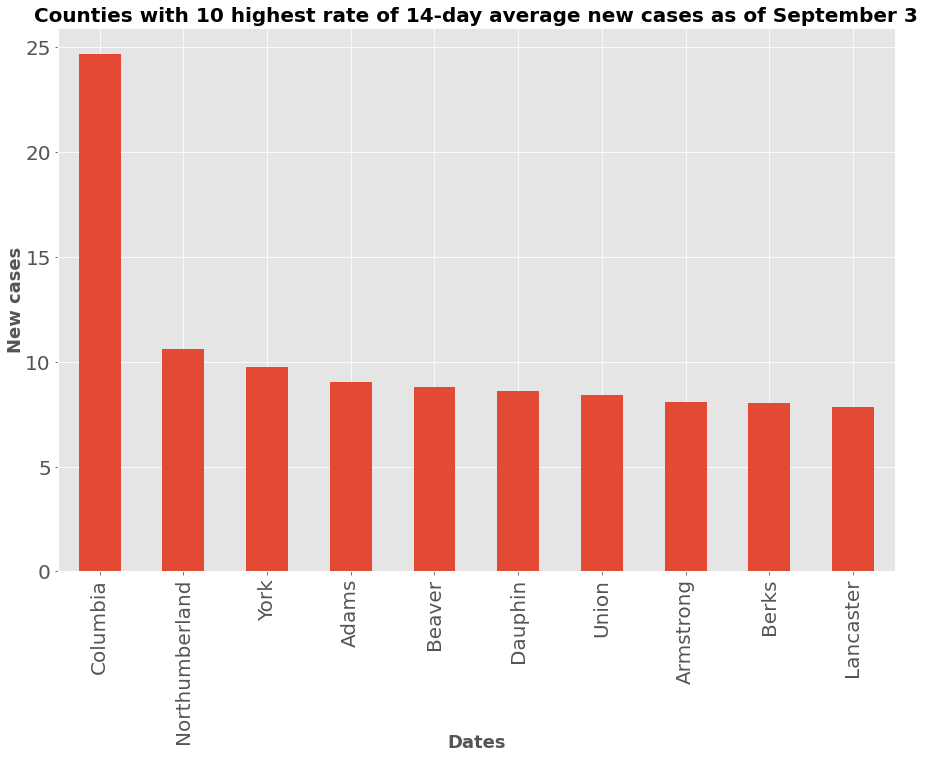

In [34]:
yesterday1=yesterday-pd.DateOffset(days=7)
pa1[pa1.date==yesterday1].groupby('county').newtest1.sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,10),fontsize=20)
plt.title('Counties with 10 highest rate of 14-day average new cases as of '+yesterday1.month_name()+" "+str(yesterday1.day),
          fontdict={'fontsize': '20',
                    'fontweight' : 'bold',
                    'verticalalignment': 'baseline'})
plt.ylabel("New cases",fontdict={'fontsize': '18',
                    'fontweight' : 'heavy',
                    'verticalalignment': 'baseline'})
plt.xlabel("Dates",fontdict={'fontsize': '18',
                    'fontweight' : 'heavy',
                    'verticalalignment': 'baseline'})

### Columbia County had only recently jumped up to the number one spot a week prior, and Centre County didn't even make the top 10. Now, neither county is in the running for the highest number of total cases, but they do appear to be showing signs of increased and near expoential spread.

Text(0.5, 0, 'Dates')

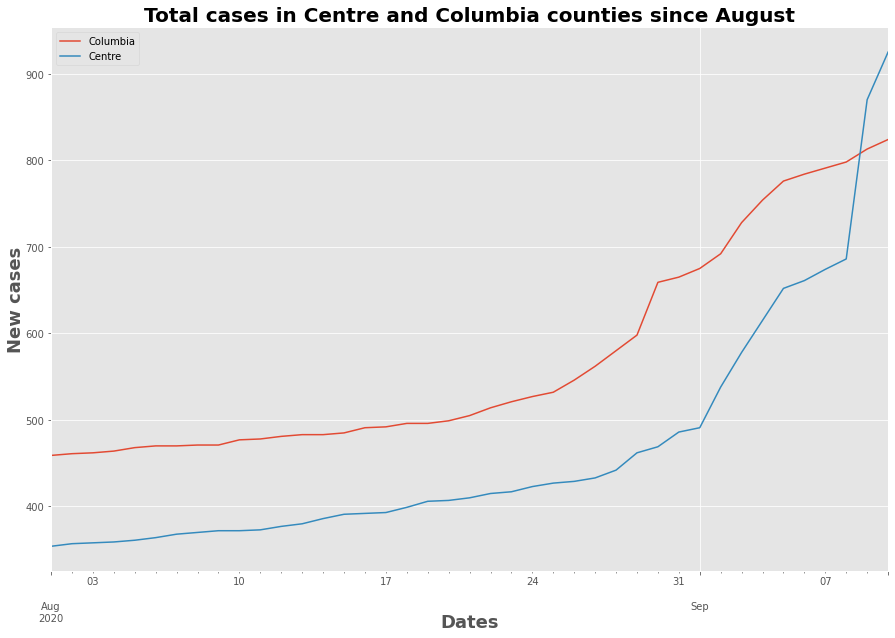

In [494]:
pa1[(pa1.date.dt.month>=8)&(pa1.county=='Columbia')].groupby('date').confirmed.sum().plot(kind='line',figsize=(15,10),legend=True, label='Columbia')
pa1[(pa1.date.dt.month>=8)&(pa1.county=='Centre')].groupby('date').confirmed.sum().plot(kind='line',figsize=(15,10),legend=True,label='Centre')
#pa1[(pa1.date.dt.month>=8)&(pa1.county=='Columbia')].groupby('date').yellow_metric.sum().plot(kind='line',figsize=(15,10),legend=True,label='Columbia Yellow')
plt.title('Total cases in Centre and Columbia counties since August',
          fontdict={'fontsize': '20',
                    'fontweight' : 'bold',
                    'verticalalignment': 'baseline'})
plt.ylabel("New cases",fontdict={'fontsize': '18',
                    'fontweight' : 'heavy',
                    'verticalalignment': 'baseline'})
plt.xlabel("Dates",fontdict={'fontsize': '18',
                    'fontweight' : 'heavy',
                    'verticalalignment': 'baseline'})
#plt.savefig('twitter_charts/ave_cases_7d_14_d_statewide_Aug_alone.jpg')

In [ ]:
pa1.case_diff_av14d

Text(0.5, 0, 'Dates')

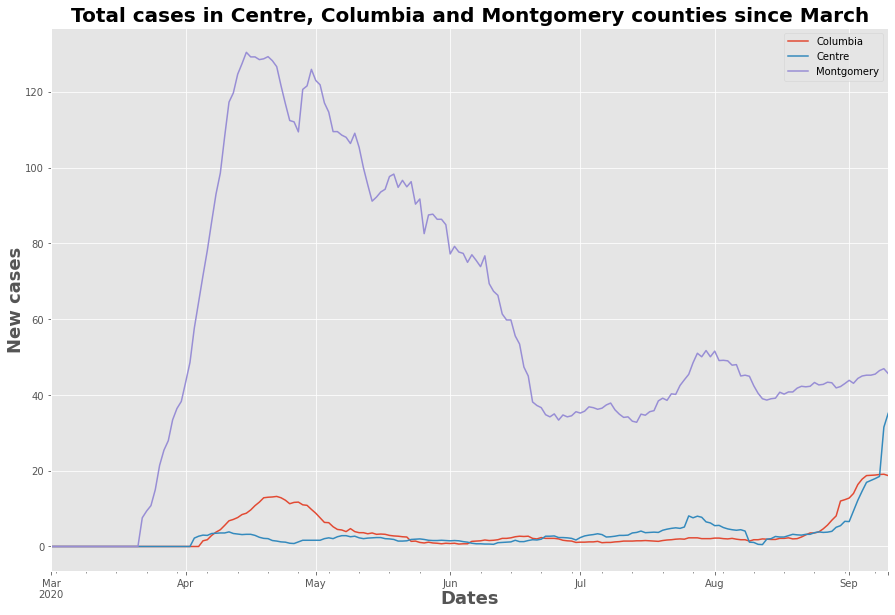

In [495]:
pa1[(pa1.date.dt.month>=3)&(pa1.county=='Columbia')].groupby('date').case_diff_av14d.sum().plot(kind='line',figsize=(15,10),legend=True, label='Columbia')
pa1[(pa1.date.dt.month>=3)&(pa1.county=='Centre')].groupby('date').case_diff_av14d.sum().plot(kind='line',figsize=(15,10),legend=True,label='Centre')
pa1[(pa1.date.dt.month>=3)&(pa1.county=='Montgomery')].groupby('date').case_diff_av14d.sum().plot(kind='line',figsize=(15,10),legend=True,label='Montgomery')
#pa1[(pa1.date.dt.month>=8)&(pa1.county=='Columbia')].groupby('date').yellow_metric.sum().plot(kind='line',figsize=(15,10),legend=True,label='Columbia Yellow')
plt.title('Total cases in Centre, Columbia and Montgomery counties since March',
          fontdict={'fontsize': '20',
                    'fontweight' : 'bold',
                    'verticalalignment': 'baseline'})
plt.ylabel("New cases",fontdict={'fontsize': '18',
                    'fontweight' : 'heavy',
                    'verticalalignment': 'baseline'})
plt.xlabel("Dates",fontdict={'fontsize': '18',
                    'fontweight' : 'heavy',
                    'verticalalignment': 'baseline'})
#plt.savefig('twitter_charts/ave_cases_7d_14_d_statewide_Aug_alone.jpg')

# Just for added context, Here's the 14-day average case difference with Montgomery County. 
# Here's what that rate looks like day-by-day since August

![display image](for_ashley/ezgif.com-crop.gif)

### Unfortunately, the scale does change with the dates. It typcially doesn't go much further than 30 cases per 100,000 people, but I wasn't able to normalize the scale when I made this and the next GIF

# And let's take it all the way back to about May as well

![display image](for_ashley/ezgif.com-crop-1.gif)

# I'm not sure what is going on, but it just looks like something is happening in these two counties, and some of their neighboring counties

<AxesSubplot:title={'center':'14-day average of new cases per 100,000 people as of September 10'}>

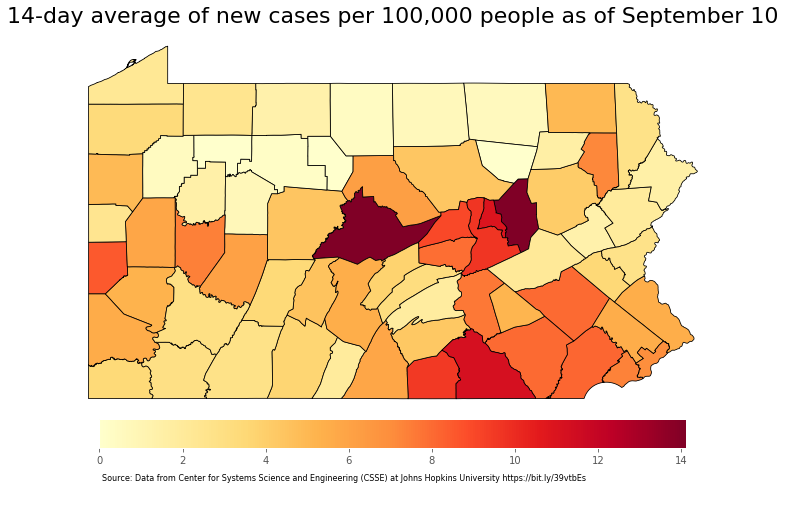

In [516]:
variable='newtest1'
vmin=map1[map1.date==yesterday1].newtest1.min()
vmax=map1[map1.date==yesterday1].newtest1.max()/2
fig, ax = plt.subplots(1,figsize=(12,9))
ax.axis("off")
ax.set_title('14-day average of new cases per 100,000 people as of '+yesterday1.month_name()+" "+str(yesterday1.day),fontdict={'fontsize':'22','fontweight':'10','color':'black'})
ax.annotate("Source: Data from Center for Systems Science and Engineering (CSSE) at Johns Hopkins University https://bit.ly/39vtbEs",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')

sm = plt.cm.ScalarMappable(cmap='YlOrRd',
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.005,aspect=20)
map1[map1.date==yesterday1].plot(column=variable, cmap="YlOrRd",vmin=vmin,vmax=vmax,linewidth=0.8,ax=ax, edgecolor='black')

# The map above is the Sept. 10 per 100,000 number but I set the maximum scale at half the maximum value. Main interstates through the areas appear to be 80 and 81.
# I suppose this could be an issue with testing capacity as well. 